In [2]:
import os
import numpy as np
import pandas as pd
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

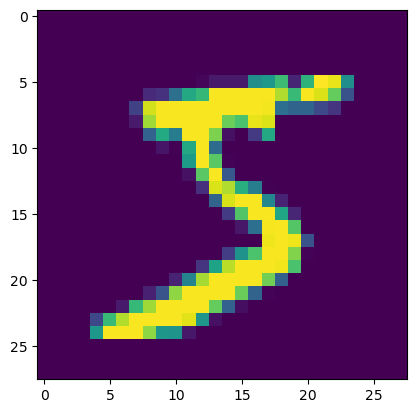

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train.reshape(-1, 28*28).astype('float32')/255.0
X_test = X_test.reshape(-1, 28*28).astype('float32')/255.0

In [6]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(512, activation=keras.activations.relu),
    keras.layers.Dense(256, activation=keras.activations.relu),
    keras.layers.Dense(10)
], name="Model_1")

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.summary()


Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001, restore_best_weights=True)

In [12]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/50
1875/1875 [==============================] - 29s 14ms/step - loss: 0.1864 - sparse_categorical_accuracy: 0.9438 - val_loss: 0.0949 - val_sparse_categorical_accuracy: 0.9705
Epoch 2/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0797 - sparse_categorical_accuracy: 0.9755 - val_loss: 0.0830 - val_sparse_categorical_accuracy: 0.9741
Epoch 3/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0824 - val_sparse_categorical_accuracy: 0.9749
Epoch 4/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.1001 - val_sparse_categorical_accuracy: 0.9703
Epoch 5/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9895 - val_loss: 0.0823 - val_sparse_categorical_accuracy: 0.9783
Epoch 6/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.

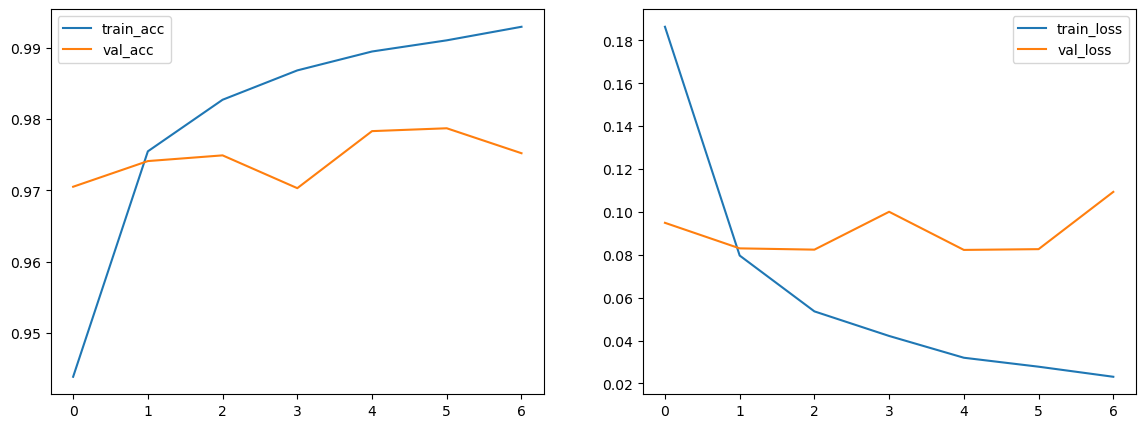

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

In [15]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

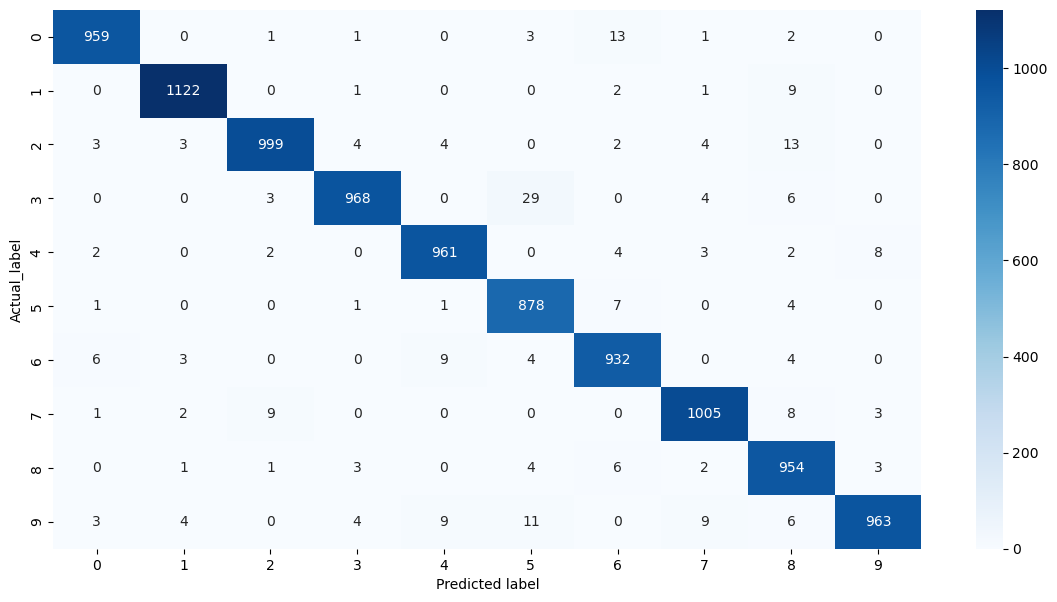

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.98      0.96       892
           6       0.96      0.97      0.97       958
           7       0.98      0.98      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual_label')
plt.show()

report = classification_report(y_test, y_pred)
print(report)

# Very good ANN model